In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import os

os.chdir(r'C:\Users\user\Desktop\연구\EGCN\성능\result')

In [18]:
df_outer = pd.read_csv('result_esol_outer.csv')
df_egcn = pd.read_csv('result_esol_egcn.csv')

print(df_outer.shape[1])

45


In [19]:
# 컬럼명 추가
columns = ['target', 'pred'] + [f'feature{i}' for i in range(1, df_outer.shape[1]-1)]
df_outer.columns = columns

columns = ['target', 'pred'] + [f'feature{i}' for i in range(1, df_egcn.shape[1]-1)]
df_egcn.columns = columns

print(df_outer.columns)
print(df_egcn.columns)

Index(['target', 'pred', 'feature1', 'feature2', 'feature3', 'feature4',
       'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10',
       'feature11', 'feature12', 'feature13', 'feature14', 'feature15',
       'feature16', 'feature17', 'feature18', 'feature19', 'feature20',
       'feature21', 'feature22', 'feature23', 'feature24', 'feature25',
       'feature26', 'feature27', 'feature28', 'feature29', 'feature30',
       'feature31', 'feature32', 'feature33', 'feature34', 'feature35',
       'feature36', 'feature37', 'feature38', 'feature39', 'feature40',
       'feature41', 'feature42', 'feature43'],
      dtype='object')
Index(['target', 'pred', 'feature1', 'feature2', 'feature3'], dtype='object')


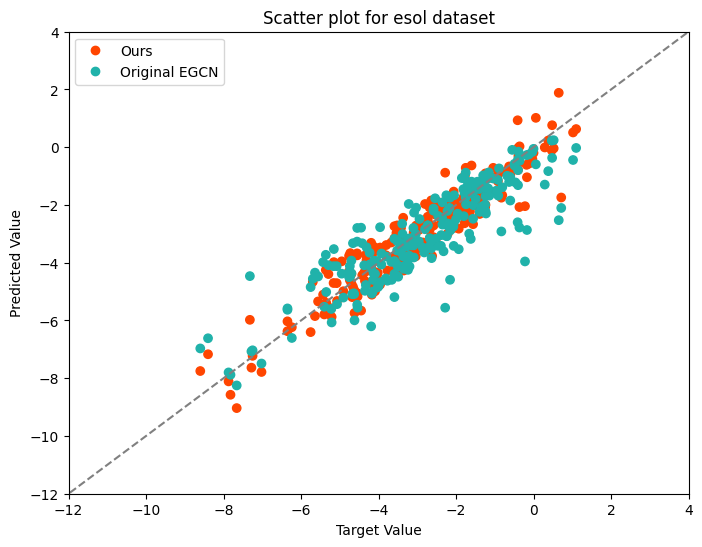

In [20]:
df_outer['source'] = 'outer'
df_egcn['source'] = 'egcn'
df_combined = pd.concat([df_outer, df_egcn], ignore_index = True)

plt.figure(figsize = (8, 6))

from matplotlib.colors import ListedColormap
pastel_cmap = ListedColormap(["#FF4500", "#20B2AA"])


scatter = plt.scatter(df_combined['target'], df_combined['pred'],
            c = df_combined['source'].apply(lambda x:0 if x == 'outer' else 1),
            cmap = pastel_cmap)

# 대각선 추가
min_val = min(df_combined['target'].min(), df_combined['pred'].min()) - 5
max_val = max(df_combined['target'].max(), df_combined['pred'].max()) + 5
plt.plot([min_val, max_val], [min_val, max_val], color='grey', linestyle='--')

legend_labels = ['Ours', 'Original EGCN']
legend_handles = scatter.legend_elements()[0]
plt.legend(legend_handles, legend_labels)

plt.xlim(-12, 4)
plt.ylim(-12, 4)
plt.xlabel("Target Value")
plt.ylabel("Predicted Value")
plt.title("Scatter plot for esol dataset")

# 저장
plt.savefig('result_esol_scatter.png', dpi = 300, bbox_inches = 'tight')

plt.show()

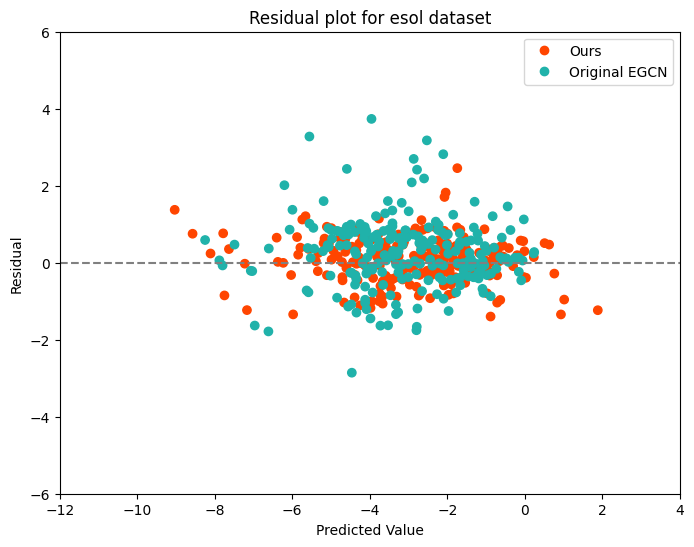

In [21]:
df_outer['source'] = 'outer'
df_egcn['source'] = 'egcn'
df_combined = pd.concat([df_outer, df_egcn], ignore_index = True)

# 잔차차
residuals = df_combined['target'] - df_combined['pred']

plt.figure(figsize = (8, 6))

from matplotlib.colors import ListedColormap
pastel_cmap = ListedColormap(["#FF4500", "#20B2AA"])


scatter = plt.scatter(df_combined['pred'], residuals,
            c = df_combined['source'].apply(lambda x:0 if x == 'outer' else 1),
            cmap = pastel_cmap)

# 수평선 추가
plt.axhline(0, color = 'grey', linestyle = '--')

legend_labels = ['Ours', 'Original EGCN']
legend_handles = scatter.legend_elements()[0]
plt.legend(legend_handles, legend_labels)

plt.xlim(-12, 4)
plt.ylim(-6, 6)
plt.xlabel("Predicted Value")
plt.ylabel("Residual")
plt.title("Residual plot for esol dataset")

# 저장
plt.savefig('result_esol_residual.png', dpi = 300, bbox_inches = 'tight')

plt.show()